In [1]:
%load_ext autoreload
%autoreload

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.io as io
import pandas as pd
from pandas import DataFrame, read_csv
from nivlink import Screen, Raw, align_to_aoi, compute_fixations, plot_heatmaps

import warnings
from scipy.stats import kde
import nivlink
import ipywidgets as wdg
from scipy.stats import iqr
print('Powered by NivLink' + str(nivlink.__version__))

Powered by NivLink0.2.5


In [5]:
## Load percent null distribution.
percent_null = pd.read_csv(os.getcwd() + '/percent_null.csv')

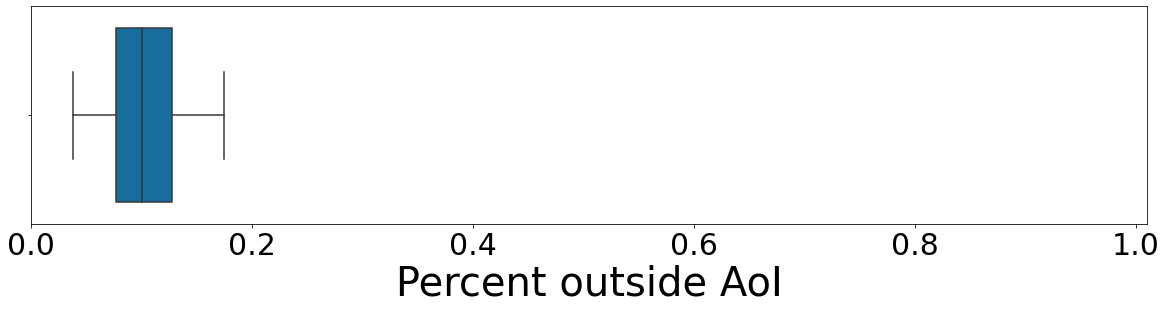

In [22]:
## Plot.
pal = sns.color_palette("colorblind", 10)

fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax = sns.boxplot(x="percent_null", data=percent_null, palette=pal, whis=1.5)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim((0,1.01))
ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_xlabel('Percent outside AoI', fontsize=40);

In [23]:
## Compute quartiles and outliers.
q_all = [np.quantile(percent_null['percent_null'].values, x) for x in [.25,.50,.75]]

print('IQR all:')
print(q_all)

## Compute outliers (1.5 IQR above 3rd quartile). 
iqr_all = q_all[2] - q_all[0]
print('Subjects that failed QA check: ')
print(list(percent_null[percent_null['percent_null'] > q_all[2] + iqr_all*1.5].reset_index(drop=True)['subj'].values.astype(int)))

IQR all:
[0.07636204742605443, 0.10069838181364484, 0.12751392052236638]
Subjects that failed QA check: 
[]


Exclusion summary:
+ Participants who failed QA 1: 33, 66
+ Participants with preproc issues: 58
+ Participants who failed QA 2: none